<a href="https://colab.research.google.com/github/dogukartal/ML-RoadMap/blob/main/Deep%20Learning/%20MIT%20Lectures/Convolutional%20Neural%20Networks/MNIST_DigitClaasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

!pip install comet_ml > /dev/null 2>&1
import comet_ml

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
COMET_API_KEY = "akOVLyRvzYzW4aWlal0cQ0wI3"
comet_ml.init(project_name="mnist_cnn", api_key=COMET_API_KEY)
comet_model_1 = comet_ml.Experiment()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/dod/mnist-cnn/81fe107e35624307942d22d8984dd585

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if you

### Fully Connected Neural Network Architecture
---

In [ ]:
def build_fully_connected_model():
  fully_connected_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
  ])
  return fully_connected_model

batch_size = 64
epochs = 5
learning_rate = 1e-1

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

model = build_fully_connected_model()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

test_loss, text_acc = model.evaluate(test_images, test_labels)

comet_model_1.end()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.3687 - accuracy: 0.8975
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1965 - accuracy: 0.9442
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1464 - accuracy: 0.9585
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.1186 - accuracy: 0.9666
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.9692


### Convolutional Neural Network (CNN)
---

In [ ]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
  ])
  return cnn_model

comet_ml.init(project_name="CNN")
comet_model_2 = comet_ml.Experiment()

batch_size = 64
epochs = 5
learning_rate = 1e-3

cnn_model = build_cnn_model()

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

cnn_model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

test_loss, text_acc = cnn_model.evaluate(test_images, test_labels)

comet_model_2.end()

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/dod/cnn/211ba419a1884d068c75fbe837211312

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


Epoch 1/5
938/938 [==============================] - 53s 55ms/step - loss: 0.1563 - accuracy: 0.9536
Epoch 2/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0476 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0329 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0244 - accuracy: 0.9922
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 0.0291 - accuracy: 0.9901


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : verbal_dormouse_8779
COMET INFO:     url                   : https://www.comet.com/dod/cnn/211ba419a1884d068c75fbe837211312
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: keras, tensorflow, tensorboard.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1/1 [==============================] - 0s 120ms/step
Prediction:  7
Label of this digit is: 7


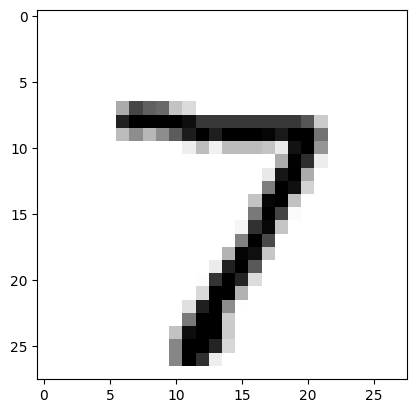

In [ ]:
prediction = np.argmax(cnn_model.predict(np.expand_dims(test_images[0], axis=0)))
print("Prediction: ", prediction)
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0], cmap=plt.cm.binary)

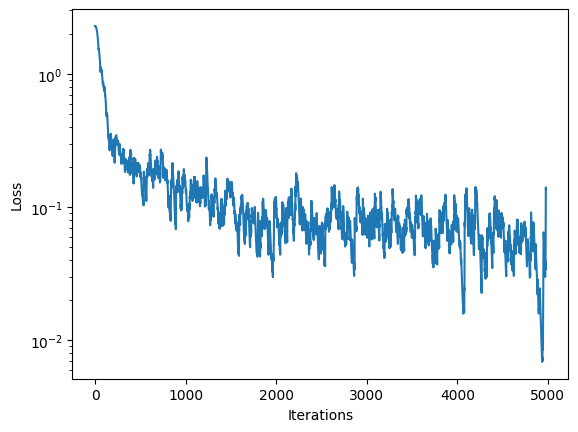

100%|██████████| 5000/5000 [04:06<00:00, 20.30it/s]
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : stable_fall_1824
COMET INFO:     url                   : https://www.comet.com/dod/cnn2/52ffb8ab6548469683a5b88d1d0b357e
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [5000] : (1.955968218680937e-05, 2.710909843444824)
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, i

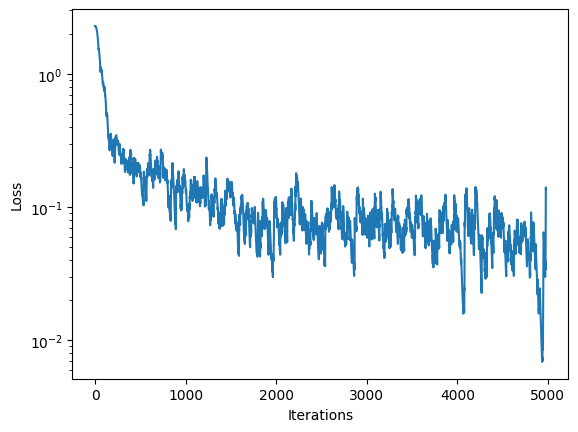

In [ ]:
comet_ml.init(project_name="CNN2")
comet_model_3 = comet_ml.Experiment()

cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm, '_instances'): tqdm._instances.clear()

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  with tf.GradientTape() as tape:
    logits = cnn_model(images)
    loss_value = tf.keras.losses.sparse_categorical_crossentropy(labels, logits)
    comet_model_3.log_metric("loss", loss_value.numpy().mean(), step=idx)

  loss_history.append(loss_value.numpy().mean())
  plotter.plot(loss_history.get())

  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

comet_model_3.log_figure(figure=plt)
comet_model_3.end()